In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# Set the default plot aesthetics to be prettier.
sns.set_style("darkgrid")

## Instructions

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

## Introduction

Using this dataset: 

In [33]:
nyc_weather = pd.read_csv("1557522.csv")

nyc_weather.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (10,11,14,15,20,23,25,26,28,29,33,34,40,67,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,REPORTTPYE,HOURLYSKYCONDITIONS,HOURLYVISIBILITY,HOURLYPRSENTWEATHERTYPE,...,MonthlyMaxSeaLevelPressureTime,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureDate,MonthlyMinSeaLevelPressureTime,MonthlyTotalHeatingDegreeDays,MonthlyTotalCoolingDegreeDays,MonthlyDeptFromNormalHeatingDD,MonthlyDeptFromNormalCoolingDD,MonthlyTotalSeasonToDateHeatingDD,MonthlyTotalSeasonToDateCoolingDD
0,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,-73.96925,2014-01-01 00:51,FM-15,CLR:00,10.00,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
1,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,-73.96925,2014-01-01 01:51,FM-15,CLR:00,10.00,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
2,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,-73.96925,2014-01-01 02:51,FM-15,CLR:00,10.00,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
3,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,-73.96925,2014-01-01 03:51,FM-15,CLR:00,10.00,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
4,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,-73.96925,2014-01-01 04:51,FM-15,CLR:00,10.00,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
nyc_weather.columns

Index(['STATION', 'STATION_NAME', 'ELEVATION', 'LATITUDE', 'LONGITUDE', 'DATE',
       'REPORTTPYE', 'HOURLYSKYCONDITIONS', 'HOURLYVISIBILITY',
       'HOURLYPRSENTWEATHERTYPE', 'HOURLYDRYBULBTEMPF', 'HOURLYDRYBULBTEMPC',
       'HOURLYWETBULBTEMPF', 'HOURLYWETBULBTEMPC', 'HOURLYDewPointTempF',
       'HOURLYDewPointTempC', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYWindDirection', 'HOURLYWindGustSpeed', 'HOURLYStationPressure',
       'HOURLYPressureTendency', 'HOURLYPressureChange',
       'HOURLYSeaLevelPressure', 'HOURLYPrecip', 'HOURLYAltimeterSetting',
       'DAILYMaximumDryBulbTemp', 'DAILYMinimumDryBulbTemp',
       'DAILYAverageDryBulbTemp', 'DAILYDeptFromNormalAverageTemp',
       'DAILYAverageRelativeHumidity', 'DAILYAverageDewPointTemp',
       'DAILYAverageWetBulbTemp', 'DAILYHeatingDegreeDays',
       'DAILYCoolingDegreeDays', 'DAILYSunrise', 'DAILYSunset', 'DAILYWeather',
       'DAILYPrecip', 'DAILYSnowfall', 'DAILYSnowDepth',
       'DAILYAverageStatio

In [46]:
nyc_daily = nyc_weather[['DATE', 'DAILYAverageDryBulbTemp', 'DAILYDeptFromNormalAverageTemp',
                      'DAILYAverageRelativeHumidity', 'DAILYAverageDewPointTemp', 'DAILYHeatingDegreeDays',
                      'DAILYCoolingDegreeDays', 'DAILYPrecip', 'DAILYAverageStationPressure',
                      'DAILYAverageWindSpeed']]

nyc_daily.columns

Index(['DATE', 'DAILYAverageDryBulbTemp', 'DAILYDeptFromNormalAverageTemp',
       'DAILYAverageRelativeHumidity', 'DAILYAverageDewPointTemp',
       'DAILYHeatingDegreeDays', 'DAILYCoolingDegreeDays', 'DAILYPrecip',
       'DAILYAverageStationPressure', 'DAILYAverageWindSpeed'],
      dtype='object')

In [47]:
nyc_daily.dropna(inplace=True)
nyc_daily.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DATE,DAILYAverageDryBulbTemp,DAILYDeptFromNormalAverageTemp,DAILYAverageRelativeHumidity,DAILYAverageDewPointTemp,DAILYHeatingDegreeDays,DAILYCoolingDegreeDays,DAILYPrecip,DAILYAverageStationPressure,DAILYAverageWindSpeed
25,2014-01-01 23:59,29,-4.4,51.0,13.0,36,0,0.00,30.18,5.6
59,2014-01-02 23:59,26,-7.3,76.0,19.0,39,0,0.33,29.86,12.2
97,2014-01-03 23:59,14,-19.1,59.0,1.0,51,0,0.29,29.84,10.4
123,2014-01-04 23:59,19,-14,48.0,2.0,46,0,0.00,30.28,4.8
176,2014-01-05 23:59,34,1.1,82.0,28.0,31,0,0.14,30.05,3.7


In [121]:
nyc_daily.dtypes

DATE                              datetime64[ns]
MONTH                                      int64
DAILYAverageDryBulbTemp                  float64
DAILYDeptFromNormalAverageTemp           float64
DAILYAverageRelativeHumidity             float64
DAILYAverageDewPointTemp                 float64
DAILYHeatingDegreeDays                   float64
DAILYCoolingDegreeDays                   float64
DAILYPrecip                              float64
DAILYAverageStationPressure              float64
DAILYAverageWindSpeed                    float64
SEASON                                     int64
HOT_HUMIDITY                             float64
WINDCHILL                                float64
HEATINDEX                                float64
dtype: object

In [122]:
nyc_daily['DATE'] = pd.to_datetime(nyc_daily['DATE'])

nyc_daily['DAILYAverageDryBulbTemp'] = pd.to_numeric(nyc_daily['DAILYAverageDryBulbTemp'], errors='coerce')
nyc_daily['DAILYDeptFromNormalAverageTemp'] = pd.to_numeric(nyc_daily['DAILYDeptFromNormalAverageTemp'], errors='coerce')
nyc_daily['DAILYHeatingDegreeDays'] = pd.to_numeric(nyc_daily['DAILYHeatingDegreeDays'], errors='coerce')
nyc_daily['DAILYCoolingDegreeDays'] = pd.to_numeric(nyc_daily['DAILYCoolingDegreeDays'], errors='coerce')
nyc_daily['DAILYPrecip'] = pd.to_numeric(nyc_daily['DAILYPrecip'], errors='coerce')

nyc_daily.dtypes

DATE                              datetime64[ns]
MONTH                                      int64
DAILYAverageDryBulbTemp                  float64
DAILYDeptFromNormalAverageTemp           float64
DAILYAverageRelativeHumidity             float64
DAILYAverageDewPointTemp                 float64
DAILYHeatingDegreeDays                   float64
DAILYCoolingDegreeDays                   float64
DAILYPrecip                              float64
DAILYAverageStationPressure              float64
DAILYAverageWindSpeed                    float64
SEASON                                     int64
HOT_HUMIDITY                             float64
WINDCHILL                                float64
HEATINDEX                                float64
dtype: object

## Variables & definitions


#### DAILYAverageDryBulbTemp
Dry-bulb temperature can be measured using a normal thermometer freely exposed to the air but shielded from radiation and moisture.

#### DAILYDeptFromNormalAverageTemp
Temperature departure from the normal indicates if the dekadal average temperatures were above or below the 30-year normal.

#### DAILYAverageRelativeHumidity
The amount of water vapor present in air expressed as a percentage of the amount needed for saturation at the same temperature.


#### DAILYAverageDewPointTemp
The dewpoint temperature is the temperature at which the air can no longer "hold" all of the water vapor which is mixed with it, and some of the water vapor must condense into liquid water. The dew point is always lower than (or equal to) the air temperature.

#### DAILYHeatingDegreeDays
A heating degree day is a measurement designed to quantify the demand for energy needed to heat a building. It is the number of degrees that a day's average temperature is below 65o Fahrenheit (18o Celsius), which is the temperature below which buildings need to be heated.

#### DAILYCoolingDegreeDays
A cooling degree day is a measurement designed to quantify the demand for energy needed to cool a building. It is the number of degrees that a day's average temperature is above 65o Fahrenheit (18o Celsius), which is the temperature above which buildings need to be cooled.

#### DAILYPrecip
The amount it has precipitated during a day.

#### DAILYAverageStationPressure
Station pressure is the pressure felt at that spot, without being adjusted for altitude.

#### DAILYAverageWindSpeed
The average wind speed during a day


In [50]:
nyc_daily.describe()

,DAILYAverageDryBulbTemp,DAILYDeptFromNormalAverageTemp,DAILYAverageRelativeHumidity,DAILYAverageDewPointTemp,DAILYHeatingDegreeDays,DAILYCoolingDegreeDays,DAILYPrecip,DAILYAverageStationPressure,DAILYAverageWindSpeed
count,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000,1532.000000,1637.000000,1637.000000
mean,56.887599,1.355101,60.107514,41.607208,11.960293,3.847892,0.140496,29.887007,5.180941
std,17.731241,7.876690,15.583262,19.394383,13.722771,5.829438,0.355805,0.214303,2.401681
min,7.000000,-28.000000,21.000000,-15.000000,0.000000,0.000000,0.000000,29.070000,0.000000
25%,43.000000,-3.400000,48.000000,27.000000,0.000000,0.000000,0.000000,29.750000,3.500000
50%,59.000000,1.300000,59.000000,44.000000,6.000000,0.000000,0.000000,29.880000,4.800000
75%,73.000000,6.100000,72.000000,58.000000,22.000000,8.000000,0.080000,30.020000,6.500000
max,89.000000,32.000000,98.000000,75.000000,58.000000,24.000000,3.030000,30.600000,18.300000


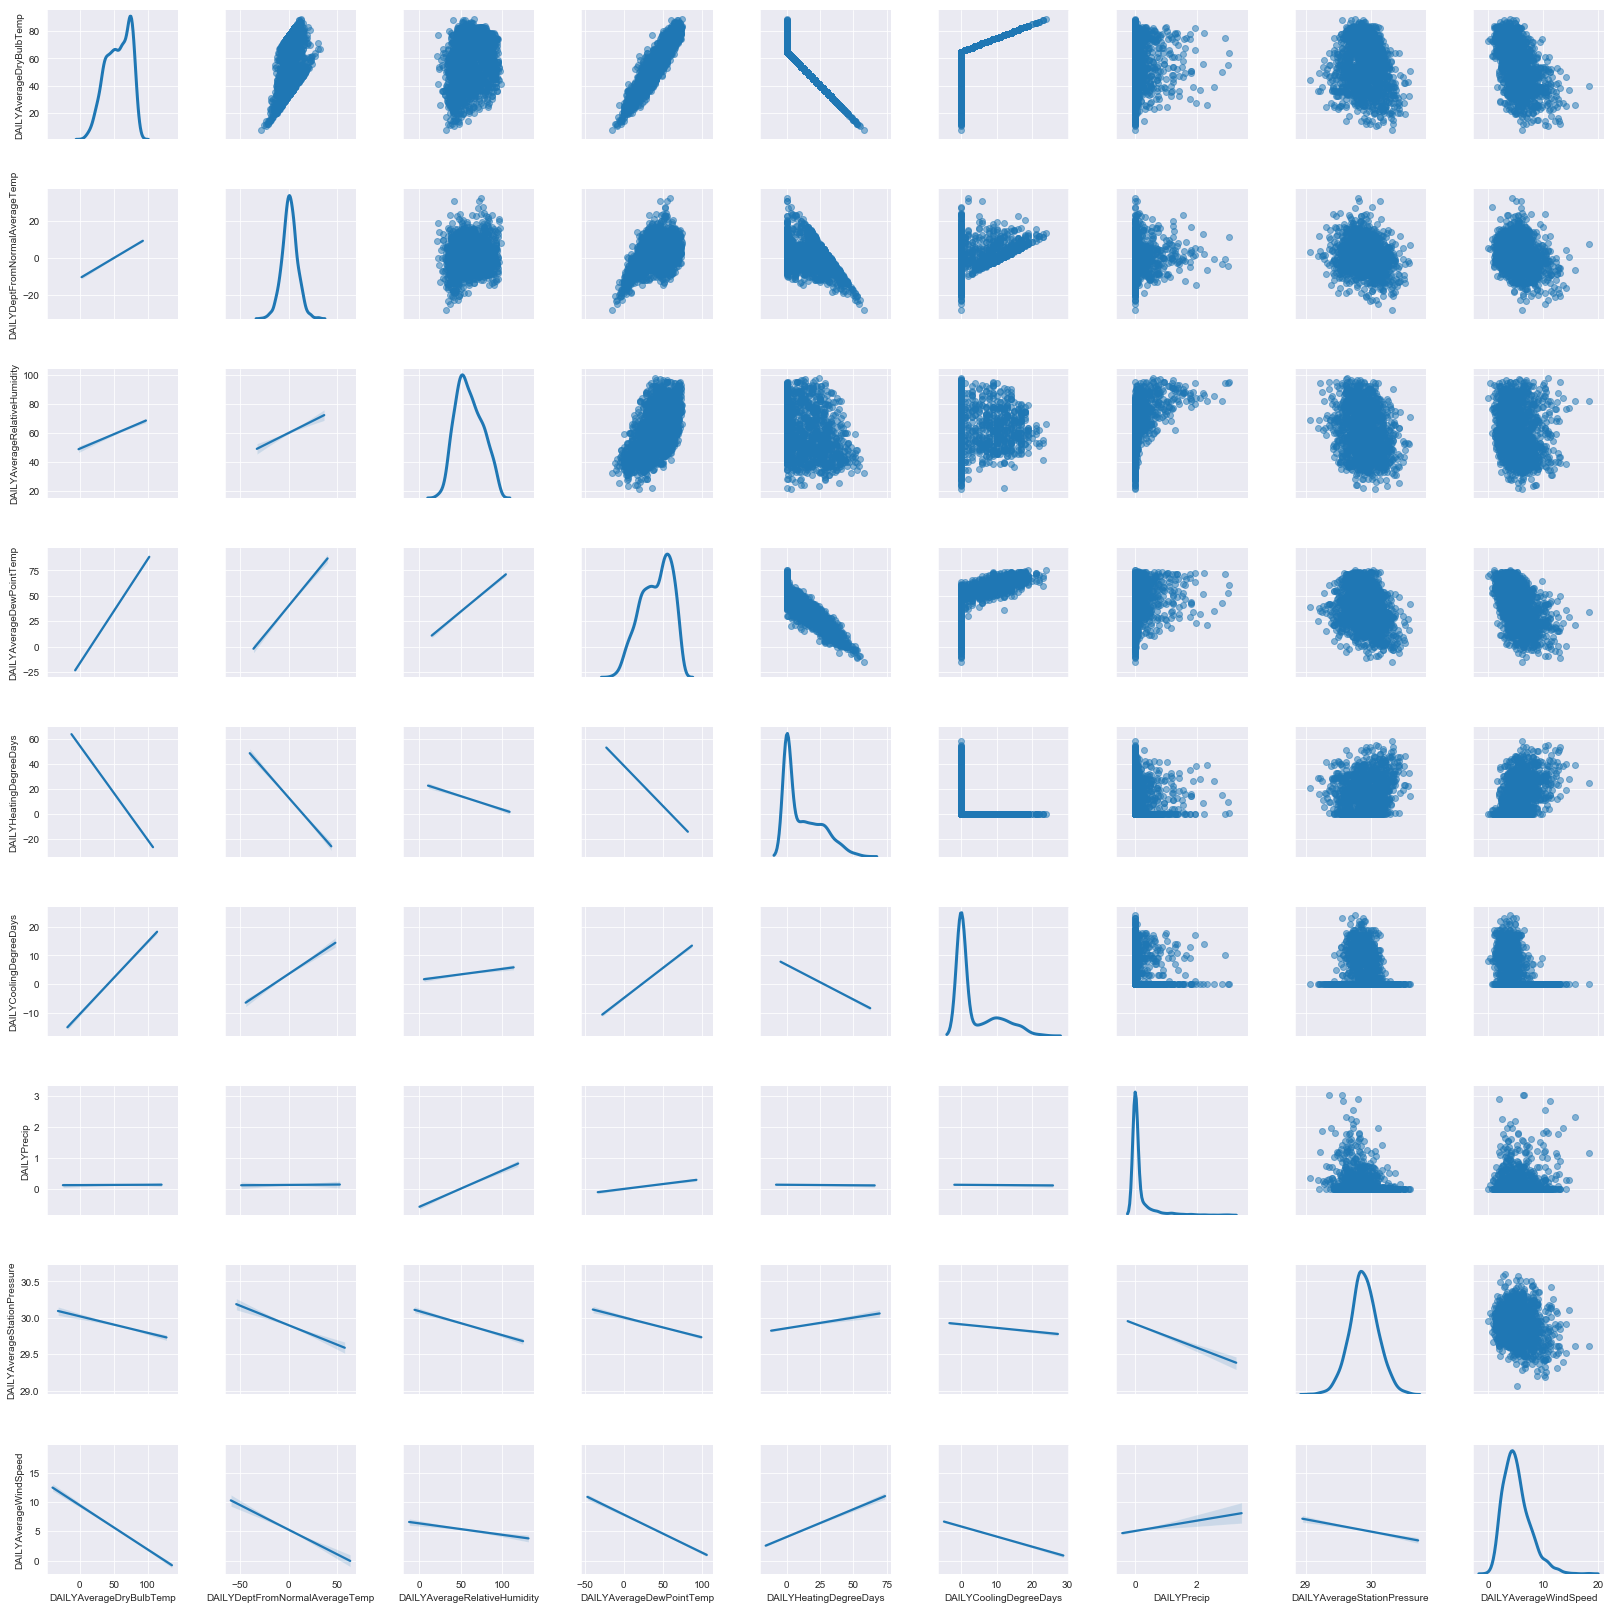

In [54]:

g = sns.PairGrid(nyc_daily, diag_sharey=False)
g.map_upper(plt.scatter, alpha=0.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)

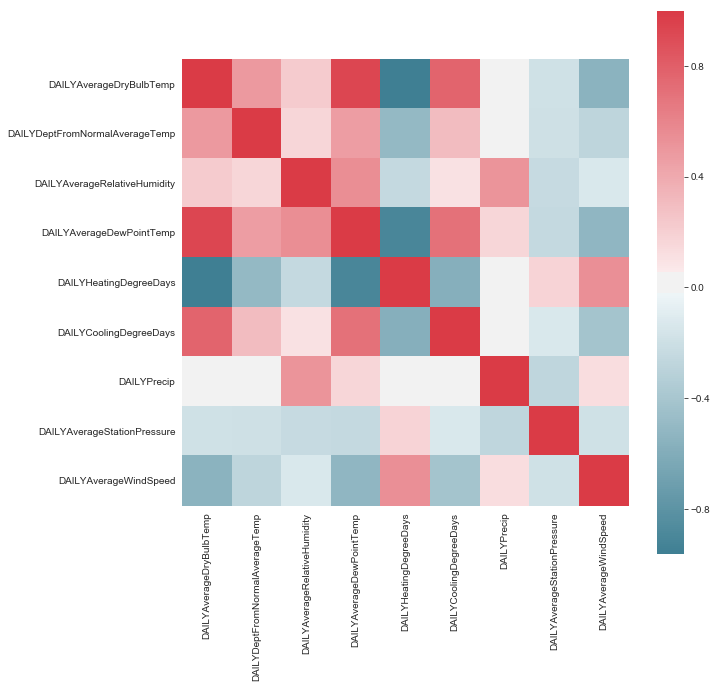

In [55]:
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(nyc_daily.corr(), square=True, cmap=cmap)
plt.show()

In [23]:
nyc_daily.corr()

,MONTH,DAILYAverageDryBulbTemp,DAILYDeptFromNormalAverageTemp,DAILYAverageRelativeHumidity,DAILYAverageDewPointTemp,DAILYHeatingDegreeDays,DAILYCoolingDegreeDays,DAILYPrecip,DAILYAverageStationPressure,DAILYAverageWindSpeed
MONTH,1.000000,0.369738,0.145621,0.161956,0.387628,-0.394229,0.195435,-0.009566,0.054117,-0.278785
DAILYAverageDryBulbTemp,0.369738,1.000000,0.490246,0.223570,0.933068,-0.963291,0.772219,0.005239,-0.187125,-0.555259
DAILYDeptFromNormalAverageTemp,0.145621,0.490246,1.000000,0.166787,0.470445,-0.502688,0.306540,0.005008,-0.195214,-0.274195
DAILYAverageRelativeHumidity,0.161956,0.223570,0.166787,1.000000,0.549339,-0.244025,0.104809,0.518982,-0.242045,-0.128219
DAILYAverageDewPointTemp,0.387628,0.933068,0.470445,0.549339,1.000000,-0.905747,0.704128,0.171273,-0.247448,-0.524184
DAILYHeatingDegreeDays,-0.394229,-0.963291,-0.502688,-0.244025,-0.905747,1.000000,-0.573304,-0.012109,0.185772,0.540218
DAILYCoolingDegreeDays,0.195435,0.772219,0.306540,0.104809,0.704128,-0.573304,1.000000,-0.012670,-0.131446,-0.416137
DAILYPrecip,-0.009566,0.005239,0.005008,0.518982,0.171273,-0.012109,-0.012670,1.000000,-0.268561,0.130287
DAILYAverageStationPressure,0.054117,-0.187125,-0.195214,-0.242045,-0.247448,0.185772,-0.131446,-0.268561,1.000000,-0.187022
DAILYAverageWindSpeed,-0.278785,-0.555259,-0.274195,-0.128219,-0.524184,0.540218,-0.416137,0.130287,-0.187022,1.000000


## New Features

#### Month:
Separate the month from the date to see the relation that the month of the year has to the temperature.

#### Season:
Building off of Month, create a variable for the season

#### hot humidity(hot_hum):
This feature captures the interaction between heat and humidity

#### windchill (windchill): 
Windchill according to the formula developed by the Joint Action Group for Temperature Indices (JAG/TI).

#### heat index:
The heat index (HI) or humiture is an index that combines air temperature and relative humidity, in shaded areas, to posit a human-perceived equivalent temperature, as how hot it would feel if the humidity were some other value in the shade. The result is also known as the "felt air temperature", "apparent temperature", "real feel" or "feels like".

In [95]:
# Month:
nyc_daily['MONTH'] = pd.DatetimeIndex(nyc_daily['DATE']).month

nyc_daily = nyc_daily[['DATE', 'MONTH', 'DAILYAverageDryBulbTemp', 'DAILYDeptFromNormalAverageTemp',
                      'DAILYAverageRelativeHumidity', 'DAILYAverageDewPointTemp', 'DAILYHeatingDegreeDays',
                      'DAILYCoolingDegreeDays', 'DAILYPrecip', 'DAILYAverageStationPressure',
                      'DAILYAverageWindSpeed']]
nyc_daily.dtypes

DATE                              datetime64[ns]
MONTH                                      int64
DAILYAverageDryBulbTemp                  float64
DAILYDeptFromNormalAverageTemp           float64
DAILYAverageRelativeHumidity             float64
DAILYAverageDewPointTemp                 float64
DAILYHeatingDegreeDays                   float64
DAILYCoolingDegreeDays                   float64
DAILYPrecip                              float64
DAILYAverageStationPressure              float64
DAILYAverageWindSpeed                    float64
dtype: object

In [96]:
# Pull out the season from the month

def season(month):
    if month < 4:
        return 1
    elif month >= 4 & month > 7:
        return 2
    elif month >= 7 & month > 10:
        return 3
    else:
        return 4

nyc_daily['SEASON'] = list(map(season, nyc_daily['MONTH']))

nyc_daily.head(2)

,DATE,MONTH,DAILYAverageDryBulbTemp,DAILYDeptFromNormalAverageTemp,DAILYAverageRelativeHumidity,DAILYAverageDewPointTemp,DAILYHeatingDegreeDays,DAILYCoolingDegreeDays,DAILYPrecip,DAILYAverageStationPressure,DAILYAverageWindSpeed,SEASON
25,2014-01-01 23:59:00,1,29.0,-4.4,51.0,13.0,36.0,0.0,0.00,30.18,5.6,1
59,2014-01-02 23:59:00,1,26.0,-7.3,76.0,19.0,39.0,0.0,0.33,29.86,12.2,1


In [97]:
# Hot Humidity
nyc_daily["HOT_HUMIDITY"] = nyc_daily['DAILYAverageDryBulbTemp'] * nyc_daily['DAILYAverageDewPointTemp']

In [98]:
# wind chill formula from Wikipedia (https://en.wikipedia.org/wiki/Wind_chill)
def windchill(temp, spd):
    # only really engineered to apply to temps below 50; we'll stretch to 60 for the purposes of apparent_temp
    if temp > 60:
        return temp
    
    return round( 35.74 + 0.6215*temp - 35.75*(spd**0.16) + 0.4275*temp*(spd**0.16), 1)

nyc_daily['WINDCHILL'] = list(map(windchill, nyc_daily['DAILYAverageDryBulbTemp'], nyc_daily['DAILYAverageWindSpeed']))

nyc_daily.head(2)

,DATE,MONTH,DAILYAverageDryBulbTemp,DAILYDeptFromNormalAverageTemp,DAILYAverageRelativeHumidity,DAILYAverageDewPointTemp,DAILYHeatingDegreeDays,DAILYCoolingDegreeDays,DAILYPrecip,DAILYAverageStationPressure,DAILYAverageWindSpeed,SEASON,HOT_HUMIDITY,WINDCHILL
25,2014-01-01 23:59:00,1,29.0,-4.4,51.0,13.0,36.0,0.0,0.00,30.18,5.6,1,377.0,23.0
59,2014-01-02 23:59:00,1,26.0,-7.3,76.0,19.0,39.0,0.0,0.33,29.86,12.2,1,494.0,15.1


In [110]:
## heat index formula found on https://en.wikipedia.org/wiki/Heat_index

C1 = [ -42.379, 2.04901523, 10.14333127, -0.22475541, -6.83783e-03, -5.481717e-02, 1.22874e-03, 8.5282e-04, -1.99e-06]
temp = nyc_daily['DAILYAverageDryBulbTemp']
hum = nyc_daily['DAILYAverageRelativeHumidity']
heatindex = C1[0] + (C1[1] * temp) + (C1[2] * hum) + (C1[3] * temp * hum) + (C1[4] * temp**2) + (C1[5] * hum**2) + (C1[6] * (temp**2) * hum) + (C1[7] * temp * (hum**2)) + (C1[8] * (temp**2) * (hum**2))

def heatind(temp, heatindex):
    if temp <= 80:
        return temp
    else:
        return heatindex

nyc_daily['HEATINDEX'] = list(map(heatind, temp, heatindex))

nyc_daily.loc[nyc_daily['DAILYAverageDryBulbTemp']>80].head(2)

,DATE,MONTH,DAILYAverageDryBulbTemp,DAILYDeptFromNormalAverageTemp,DAILYAverageRelativeHumidity,DAILYAverageDewPointTemp,DAILYHeatingDegreeDays,DAILYCoolingDegreeDays,DAILYPrecip,DAILYAverageStationPressure,DAILYAverageWindSpeed,SEASON,HOT_HUMIDITY,WINDCHILL,HEATINDEX
5376,2014-06-18 23:59:00,6,82.0,9.7,49.0,62.0,0.0,17.0,0.0,29.75,5.9,4,5084.0,82.0,82.620692
5733,2014-07-01 23:59:00,7,81.0,5.7,65.0,67.0,0.0,16.0,0.0,29.74,5.1,4,5427.0,81.0,83.812668


In [111]:
# sort corr map by the average temperature

corrmat = nyc_daily.corr()
corrmat["abs_corr"] = abs(corrmat["DAILYAverageDryBulbTemp"])
corrmat = corrmat.sort_values("abs_corr", ascending=False)
corrmat

,MONTH,DAILYAverageDryBulbTemp,DAILYDeptFromNormalAverageTemp,DAILYAverageRelativeHumidity,DAILYAverageDewPointTemp,DAILYHeatingDegreeDays,DAILYCoolingDegreeDays,DAILYPrecip,DAILYAverageStationPressure,DAILYAverageWindSpeed,SEASON,HOT_HUMIDITY,WINDCHILL,HEATINDEX,abs_corr
DAILYAverageDryBulbTemp,0.369738,1.000000,0.490246,0.223570,0.933068,-0.963291,0.772219,0.005239,-0.187125,-0.555259,0.668811,0.956753,0.997414,0.998622,1.000000
HEATINDEX,0.367009,0.998622,0.491625,0.224058,0.932380,-0.955168,0.787240,0.005136,-0.185800,-0.553068,0.662859,0.960026,0.995014,1.000000,0.998622
WINDCHILL,0.381516,0.997414,0.500863,0.228273,0.932134,-0.973548,0.740051,-0.000176,-0.171624,-0.588287,0.680296,0.946191,1.000000,0.995014,0.997414
DAILYHeatingDegreeDays,-0.394229,-0.963291,-0.502688,-0.244025,-0.905747,1.000000,-0.573304,-0.012109,0.185772,0.540218,-0.702290,-0.882185,-0.973548,-0.955168,0.963291
HOT_HUMIDITY,0.353289,0.956753,0.421716,0.403236,0.968790,-0.882185,0.832179,0.098515,-0.203842,-0.540439,0.611187,1.000000,0.946191,0.960026,0.956753
DAILYAverageDewPointTemp,0.387628,0.933068,0.470445,0.549339,1.000000,-0.905747,0.704128,0.171273,-0.247448,-0.524184,0.630616,0.968790,0.932134,0.932380,0.933068
DAILYCoolingDegreeDays,0.195435,0.772219,0.306540,0.104809,0.704128,-0.573304,1.000000,-0.012670,-0.131446,-0.416137,0.379128,0.832179,0.740051,0.787240,0.772219
SEASON,0.749424,0.668811,0.125934,0.161633,0.630616,-0.702290,0.379128,-0.007282,-0.047014,-0.410746,1.000000,0.611187,0.680296,0.662859,0.668811
DAILYAverageWindSpeed,-0.278785,-0.555259,-0.274195,-0.128219,-0.524184,0.540218,-0.416137,0.130287,-0.187022,1.000000,-0.410746,-0.540439,-0.588287,-0.553068,0.555259
DAILYDeptFromNormalAverageTemp,0.145621,0.490246,1.000000,0.166787,0.470445,-0.502688,0.306540,0.005008,-0.195214,-0.274195,0.125934,0.421716,0.500863,0.491625,0.490246
